In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
names=['model','option','year','odometer','fuel','price']
avante = pd.read_csv('./data/avante_df.csv')
genesis = pd.read_csv('./data/genesis_df.csv')
grandure = pd.read_csv('./data/grandure_df.csv')
sonata = pd.read_csv('./data/sonata_df.csv')
santafe = pd.read_csv('./data/santafe_df.csv')

avante = pd.DataFrame(data=avante).reset_index().iloc[:,2:]
genesis = pd.DataFrame(genesis).reset_index().iloc[:,2:]
grandure = pd.DataFrame(grandure).reset_index().iloc[:,2:]
sonata = pd.DataFrame(sonata).reset_index().iloc[:,2:]
santafe = pd.DataFrame(santafe).reset_index().iloc[:,2:]

dfs=[avante,genesis,grandure,sonata,santafe]
# dfs_names=['avante_df','genesis_df','grandure_df','sonata_df','santafe_df']
train = pd.concat(dfs,axis=0)
train

,model,option,year,odometer,fuel,price,car
0,아반떼 AD,1.6 GDI 밸류 플러스,18/02식,46374,가솔린,1300,avante
1,더 뉴 아반떼,1.6 GDi 스마트 기본형,14/05식,78255,가솔린,880,avante
2,아반떼 AD,1.6 GDI 스타일,16/12식(17년형),60873,가솔린,1199,avante
3,아반떼 AD,1.6 GDI 밸류 플러스,18/02식,46374,가솔린,1300,avante
4,아반떼 MD,M16 GDI 럭셔리,12/08식,93310,가솔린,660,avante
...,...,...,...,...,...,...,...
3809,싼타페 DM,디젤(e-VGT) 2.0 2WD 익스클루시브,14/07식(15년형),78199,디젤,1470,santafe
3810,싼타페 TM,디젤 2.0 2WD 익스클루시브,18/02식(19년형),40533,디젤,2580,santafe
3811,싼타페 DM,디젤(e-VGT) 2.0 2WD 익스클루시브,12/09식(13년형),133200,디젤,1350,santafe
3812,싼타페 DM,디젤(e-VGT) 2.0 2WD 프리미엄,14/03식(15년형),83132,디젤,1660,santafe


In [ ]:
# only one-hot encoding

In [10]:
from tensorflow.keras.utils import to_categorical
train_df = pd.get_dummies(train, columns =['model','option','year','fuel','car'])
train_df

,odometer,price,model_EF 쏘나타,model_EQ900,model_G70,model_G80,model_G80 (RG3),model_G90,model_G90 (RS4),model_GV60,...,fuel_가솔린+CNG,fuel_가솔린+LPG,fuel_가솔린+전기,fuel_디젤,fuel_전기,car_avante,car_genesis,car_grandure,car_santafe,car_sonata
0,46374,1300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,78255,880,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,60873,1199,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,46374,1300,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,93310,660,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,78199,1470,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3810,40533,2580,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3811,133200,1350,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3812,83132,1660,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
from sklearn import datasets, preprocessing
from sklearn import model_selection
train_data, test_data, train_label, test_label = model_selection.train_test_split(train_df.drop('price',axis=1), train_df['price'],
                                                                                 test_size=0.2,
                                                                                 random_state=0)
train_data.shape, test_data.shape, train_label.shape, test_label.shape

((24467, 1104), (6117, 1104), (24467,), (6117,))

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# min_max normalization
# copy the data
train_scaled = train_data.copy()
test_scaled = test_data.copy()
train_label_scaled = train_label.copy()
test_label_scaled = test_label.copy()
# apply normalization techniques
# for column in train_scaled.columns:
#     train_scaled[column] = (train_scaled[column] - train_scaled[column].min()) / (train_scaled[column].max() - train_scaled[column].min())
#     test_scaled[column] = (test_scaled[column] - test_scaled[column].min()) / (test_scaled[column].max() - test_scaled[column].min())


In [52]:
# StandardScaler
std_scaler = StandardScaler()
train_std = std_scaler.fit_transform(train_scaled)
test_std = std_scaler.transform(test_scaled)

train_label_std = std_scaler.fit_transform(train_label_scaled.values.reshape(-1,1))
test_label_std = std_scaler.transform(test_label_scaled.values.reshape(-1,1))


In [25]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [57]:
model = models.Sequential()

model.add(layers.Dense(input_dim=1104, units=512, activation=None, kernel_initializer=initializers.he_uniform()))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=2048, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=1024, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=128, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))
model.add(layers.Dropout(rate=0.4))

model.add(layers.Dense(units=1, activation=None))

In [58]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.mean_squared_error, 
              metrics=[metrics.mean_squared_error])

In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               565760    
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 2048)              1050624   
                                                                 
 batch_normalization_4 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 2048)             

In [65]:
history = model.fit(train_std, train_label, batch_size=1000, epochs=100, validation_split=0.3, verbose=0)

2022-07-06 15:53:23.085326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-06 15:53:24.899533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [66]:
result = model.evaluate(test_std, test_label)

print('loss (mean_squared_error) :', result[0])

192/192 [==============================] - 2s 8ms/step - loss: 473204.4375 - mean_squared_error: 473204.4375
loss (mean_squared_error) : 473204.4375


In [72]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

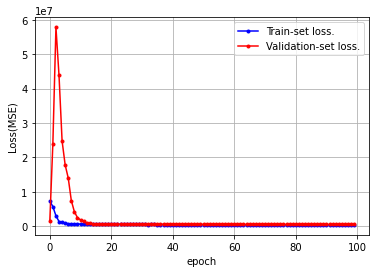

In [73]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

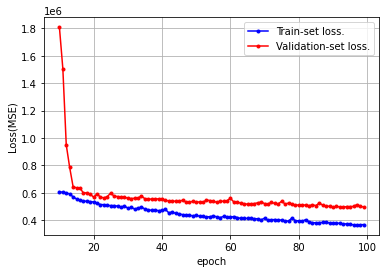

In [74]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len[10:], loss[10:], marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len[10:], val_loss[10:], marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()

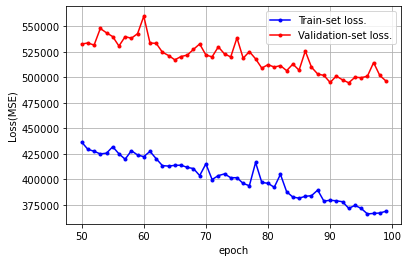

In [75]:
loss = history.history['mean_squared_error']
val_loss = history.history['val_mean_squared_error']

x_len = np.arange(len(loss))

plt.plot(x_len[50:], loss[50:], marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len[50:], val_loss[50:], marker='.', c='red', label="Validation-set loss.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Loss(MSE)')
plt.show()